In [1]:
import os
import glob
import sys

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from eda_helpers import plot_bargraph_with_groupings, plot_images

base_path = '../../data/marvel/marvel'

## Extract train dataset

In [2]:
train_base = os.path.join(base_path, 'train')

train_df = pd.DataFrame(columns=['image', 'label', 'class'])
classes = []
i = 0
for dir_name in os.listdir(train_base):
    className = '-'.join(dir_name.split(' '))
    classes.append(className)
    
    images = []
    for class_dir in os.scandir(os.path.join(train_base, dir_name)):
        images.append([class_dir.path, className, i])
            
    train_class_df = pd.DataFrame(np.array(images), columns=['image', 'label', 'class'])
    
    train_df = train_df.append(train_class_df)
    i += 1
    
train_df = train_df.reset_index(drop=True)

In [3]:
train_df.head(5)

,image,label,class
0,../../data/marvel/marvel/train/spider-man/pic_...,spider-man,0
1,../../data/marvel/marvel/train/spider-man/pic_...,spider-man,0
2,../../data/marvel/marvel/train/spider-man/pic_...,spider-man,0
3,../../data/marvel/marvel/train/spider-man/pic_...,spider-man,0
4,../../data/marvel/marvel/train/spider-man/pic_...,spider-man,0


## Extract test dataset

In [4]:
test_base = os.path.join(base_path, 'valid')

test_df = pd.DataFrame(columns=['image', 'label', 'class'])
for dir_name in os.listdir(test_base):
    className = '-'.join(dir_name.split(' '))
    
    images = []
    for class_dir in os.scandir(os.path.join(test_base, dir_name)):
        images.append([class_dir.path, className, classes.index(className)])
            
    test_class_df = pd.DataFrame(np.array(images), columns=['image', 'label', 'class'])
    
    test_df = test_df.append(test_class_df)
    i += 1
test_df = test_df.reset_index(drop=True)

In [5]:
test_df.head(5)

,image,label,class
0,../../data/marvel/marvel/valid/spider-man/pic_...,spider-man,0
1,../../data/marvel/marvel/valid/spider-man/pic_...,spider-man,0
2,../../data/marvel/marvel/valid/spider-man/pic_...,spider-man,0
3,../../data/marvel/marvel/valid/spider-man/pic_...,spider-man,0
4,../../data/marvel/marvel/valid/spider-man/pic_...,spider-man,0


## Train Dataset Examples

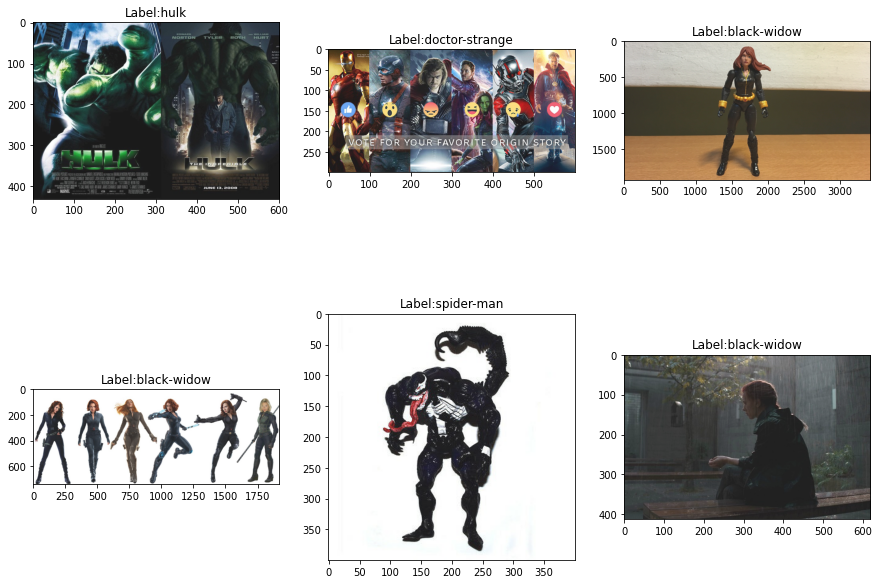

In [6]:
plot_images(train_df, '')

## Train Data Distribution

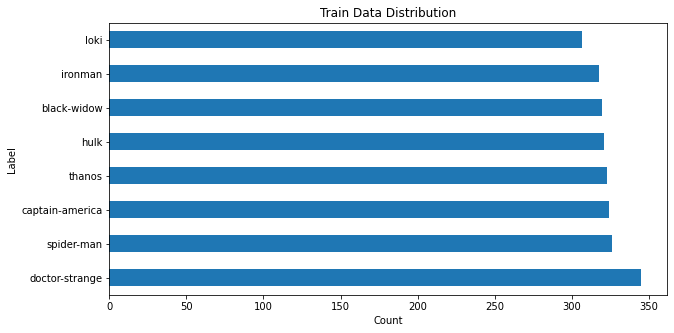

In [10]:
plot_bargraph_with_groupings(train_df, 'label', 'Train Data Distribution', 'Count', 'Label', figsize=(10,5))

In [8]:
train_df['label'].value_counts()

doctor-strange     345
spider-man         326
captain-america    324
thanos             323
hulk               321
black-widow        320
ironman            318
loki               307
Name: label, dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   2584 non-null   object
 1   label   2584 non-null   object
 2   class   2584 non-null   object
dtypes: object(3)
memory usage: 60.7+ KB


## Test Data Distribution

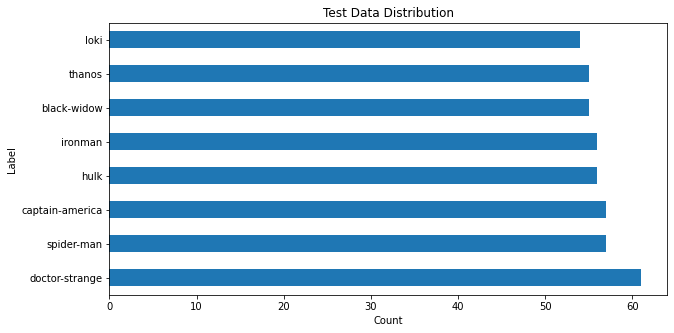

In [11]:
plot_bargraph_with_groupings(test_df, 'label', 'Test Data Distribution', 'Count', 'Label', figsize=(10,5))

In [12]:
test_df['label'].value_counts()

doctor-strange     61
spider-man         57
captain-america    57
ironman            56
hulk               56
black-widow        55
thanos             55
loki               54
Name: label, dtype: int64

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   451 non-null    object
 1   label   451 non-null    object
 2   class   451 non-null    object
dtypes: object(3)
memory usage: 10.7+ KB
